In [37]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [33]:
df = pd.read_csv('4222twitterdata_cleaned.csv')
df.shape

(78880, 12)

In [106]:
df_cleaned = df.drop_duplicates()
df_cleaned.shape

(64694, 12)

In [107]:
df_cleaned

,personality,date,location,tweet,username,bio,followers,following,favourites,retweets,hashtags,cleaned_text
0,INFP,2021-02-21 10:10:37,Canada,Why is this video SENDING me https://t.co/LPGA...,INFP_Thoughts,Some daily thoughts and opinions of an INFP. 9...,14913,195,0,0,[],Why is this video SENDING me
1,INFP,2021-02-20 06:42:52,Canada,"@YanYears Agreeeeee, buttheycanmakezutaraathin...",INFP_Thoughts,Some daily thoughts and opinions of an INFP. 9...,14913,195,0,0,[],"Agreeeeee, buttheycanmakezutaraathingiftheywan..."
2,INFP,2021-02-20 06:39:21,Canada,@YanYears Some people are speculating that the...,INFP_Thoughts,Some daily thoughts and opinions of an INFP. 9...,14913,195,0,0,[],Some people are speculating that they want to ...
3,INFP,2021-02-20 06:35:48,Canada,Why. https://t.co/afvleXpsSi,INFP_Thoughts,Some daily thoughts and opinions of an INFP. 9...,14913,195,21,2,[],Why.
4,INFP,2021-02-14 03:38:39,Canada,@intp_lola God I love Nasir,INFP_Thoughts,Some daily thoughts and opinions of an INFP. 9...,14913,195,1,0,[],God I love Nasir
...,...,...,...,...,...,...,...,...,...,...,...,...
78875,ESTJ,2016-10-09 15:12:23,OXFORD,RT @BishStuart: You get out what you put in @H...,TheGloveManUK,FA Level 2 qualified footy coach. Writer of in...,1276,1937,0,5,[],: You get out what you put in % top of the league
78876,ESTJ,2016-10-09 15:10:57,OXFORD,RT @AllistairMcCaw: Great coaching and leaders...,TheGloveManUK,FA Level 2 qualified footy coach. Writer of in...,1276,1937,0,32,[],: Great coaching and leadership is about makin...
78877,ESTJ,2016-10-09 15:10:31,OXFORD,RT @DerbyshireFA: The #Derbyshire Walking Foot...,TheGloveManUK,FA Level 2 qualified footy coach. Writer of in...,1276,1937,0,3,['Derbyshire'],: The Walking Football League's Evening Divisi...
78878,ESTJ,2016-10-09 00:20:39,OXFORD,RT @ShitJokes: Safety meeting at work\n\nThey ...,TheGloveManUK,FA Level 2 qualified footy coach. Writer of in...,1276,1937,0,463,[],": Safety meeting at workThey asked me ""What st..."


In [108]:
users = df.username.unique()
users

array(['INFP_Thoughts', 'INFPprobs', 'BarackOMamba', ..., '1moreangie',
       'TrebleVandoren', 'TheGloveManUK'], dtype=object)

In [104]:

# user_tweets = df.loc[df['username'] == 'INFPprobs']
# user_tweets.reset_index(drop = True)
# personality = user_tweets.iloc[0,0]
# followers = user_tweets.head(1)['followers']
# following = user_tweets.head(1)['following']
# favourites = user_tweets.favourites.mean()
# retweets = user_tweets.favourites.mean()


In [135]:
users_dict = {}
for user in users:
    user_tweets = df.loc[df['username'] == user]
    user_tweets.reset_index()
    personality = user_tweets.iloc[0,0]
    followers = int(user_tweets.head(1)['followers'])
    following = int(user_tweets.head(1)['following'])
    avg_favourites = user_tweets.favourites.mean()
    avg_retweets = user_tweets.retweets.mean()
    sum_favourites = user_tweets.favourites.sum()
    sum_retweets = user_tweets.retweets.sum()
    users_dict[user] = [personality, followers, following, avg_favourites, avg_retweets, sum_favourites, sum_retweets]

In [136]:
users_dict

{'INFP_Thoughts': ['INFP', 14913, 195, 10.12, 1406.86, 1012, 140686],
 'INFPprobs': ['INFP', 6612, 41, 34.88, 8833.22, 3488, 883322],
 'BarackOMamba': ['INFP', 1609, 1301, 0.2, 851.76, 20, 85176],
 'infp_things': ['INFP', 1089, 466, 5.22, 0.42, 522, 42],
 'LauraAnnTull': ['INFP', 1616, 2388, 0.06, 30.22, 6, 3022],
 'endlessgucci': ['INFP', 2809, 146, 0.04, 2805.07, 4, 280507],
 'YetAnotherINFP': ['INFP', 1062, 344, 1.36, 0.1, 136, 10],
 'Infp_Ace': ['INFP', 1313, 1316, 0.3, 969.26, 30, 96926],
 'INF_club': ['INFP', 778, 722, 1.44, 2.3, 216, 345],
 'BaldBeard69': ['INFP', 853, 1613, 0.66, 761.5, 66, 76150],
 'INFPPrincess': ['INFP', 1582, 228, 5.21, 0.94, 521, 94],
 'infpdiary': ['INFP', 1100, 74, 0.3, 11545.5, 30, 1154550],
 'JeypsDomingo': ['INFP', 379, 1238, 0.1, 22237.45, 10, 2223745],
 'jas_indie': ['INFP', 771, 997, 0.82, 32.45, 82, 3245],
 'moodyinfp': ['INFP', 992, 249, 3.38, 3957.48, 338, 395748],
 'INFP9A': ['INFP', 122, 945, 0.26, 1103.53, 26, 110353],
 'UmaINFP': ['INFP', 75

In [137]:
users_df = pd.DataFrame.from_dict(users_dict, orient='index',columns=['personality', 'followers', 'following','avg favourites', 'avg retweets', 'sum favourites', 'sum_retweets'])
users_df = users_df.reset_index()

In [138]:
users_df

,index,personality,followers,following,avg favourites,avg retweets,sum favourites,sum_retweets
0,INFP_Thoughts,INFP,14913,195,10.12,1406.86,1012,140686
1,INFPprobs,INFP,6612,41,34.88,8833.22,3488,883322
2,BarackOMamba,INFP,1609,1301,0.20,851.76,20,85176
3,infp_things,INFP,1089,466,5.22,0.42,522,42
4,LauraAnnTull,INFP,1616,2388,0.06,30.22,6,3022
...,...,...,...,...,...,...,...,...
1280,GrantJEdwards,ESTJ,625,347,3.04,8046.28,152,402314
1281,quarry_error,ESTJ,822,2321,0.82,2666.92,41,133346
1282,1moreangie,ESTJ,1154,972,0.46,2089.38,23,104469
1283,TrebleVandoren,ESTJ,1709,563,1.66,4323.64,83,216182


In [139]:
users_df.describe()

,followers,following,avg favourites,avg retweets,sum favourites,sum_retweets
count,1285.000000,1285.000000,1285.000000,1285.000000,1285.00000,1.285000e+03
mean,5761.789883,1306.185992,12.686432,3055.341824,755.73463,1.794686e+05
std,28761.567083,7273.982137,98.888674,7902.579127,5371.31554,4.556545e+05
min,6.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00
25%,320.000000,203.000000,0.500000,12.380000,29.00000,7.020000e+02
50%,870.000000,494.000000,1.200000,468.430000,68.00000,2.655400e+04
75%,2370.000000,1076.000000,3.320000,2676.080000,218.00000,1.552900e+05
max,623674.000000,191577.000000,2693.480000,112111.520000,134674.00000,5.605576e+06


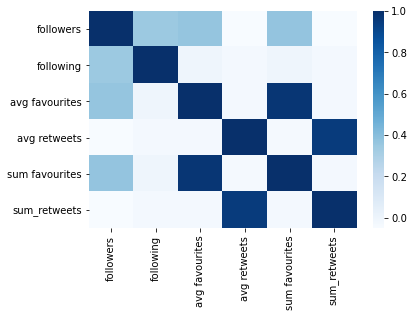

In [140]:
sns.heatmap(users_df.corr(),cmap='Blues') 

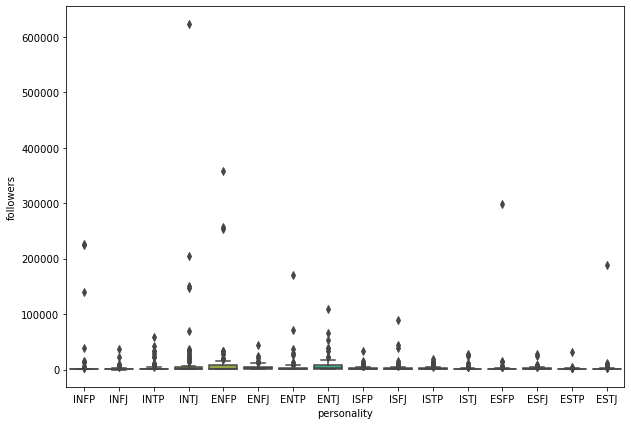

In [141]:
plt.figure(figsize=(10,7))
sns.boxplot(x="personality", y="followers", data=users_df)

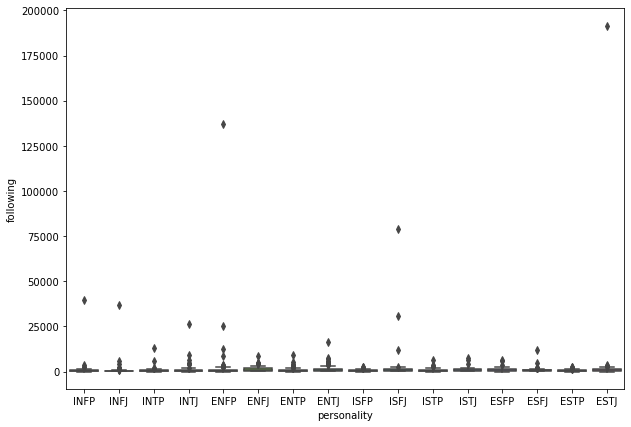

In [142]:
plt.figure(figsize=(10,7))
sns.boxplot(x="personality", y="following", data=users_df)

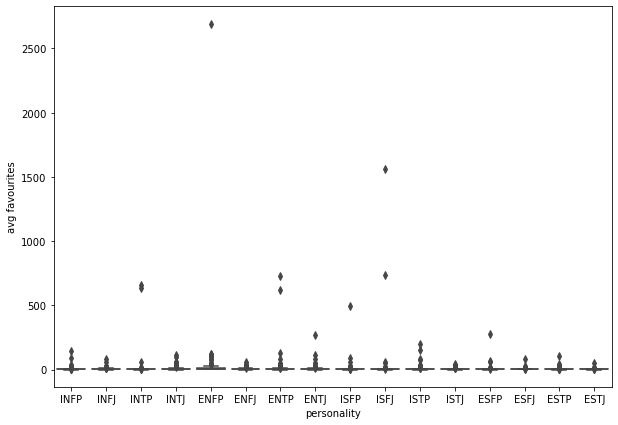

In [143]:
plt.figure(figsize=(10,7))
sns.boxplot(x="personality", y="avg favourites", data=users_df)

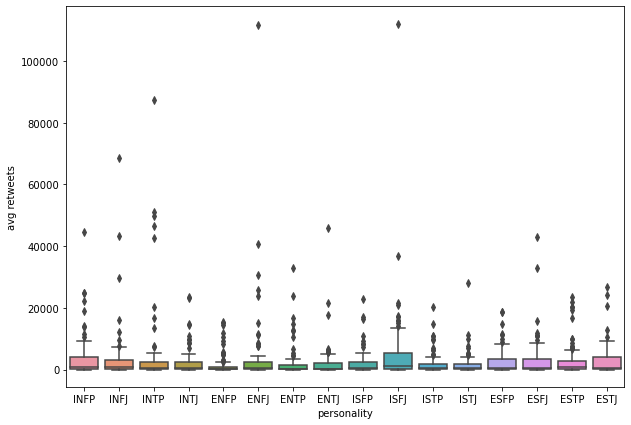

In [144]:
plt.figure(figsize=(10,7))
sns.boxplot(x="personality", y="avg retweets", data=users_df)

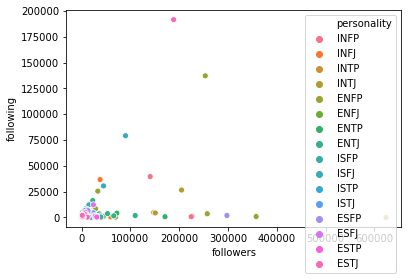

In [145]:
sns.scatterplot('followers', 'following', data=users_df, hue='personality')

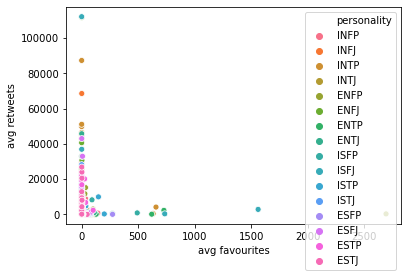

In [146]:
sns.scatterplot('avg favourites', 'avg retweets', data=users_df, hue='personality')